# 提出问题

Question: 有哪些因素会让船上的人生还率更高？  
  
Answer:   
猜测有以下因素：
1. 性别
2. 年龄
3. 舱房等级


# 调查数据
## 读取源数据

In [70]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

titanic_df = pd.read_csv('titanic-data.csv')
titanic_df

Populating the interactive namespace from numpy and matplotlib


PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN

## 数据整理
### 补充缺失值
表格中，年龄Age和舱房Cabin存在空值。 用“0”补充上，表示：未知

In [71]:
titanic_fill = titanic_df.fillna(value=0)
titanic_fill.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500     0        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250     0        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500     0        S

### 筛选数据

考虑生还率的相关因素，可能是：
1. 年龄
2. 性别
3. 舱房等级

In [219]:
titanic_key_factors = titanic_fill[['Survived', 'Pclass', 'Sex', 'Age']]
titanic_key_factors.head()

Survived  Pclass     Sex   Age
0         0       3    male  22.0
1         1       1  female  38.0
2         1       3  female  26.0
3         1       1  female  35.0
4         0       3    male  35.0

# 探索与分析
对上述考虑的三种因素分别进行分析：
1. 单因素分析
2. 多因素综合分析

## 单因素分析
### 舱房等级

In [284]:
titanic_pclass = titanic_key_factors[['Survived', 'Pclass']]
# 按 Pclass 分组
groupby_pclass = titanic_pclass.groupby('Pclass')
# 各 Pclass 的总人数
total_groupby_pclass = groupby_pclass.count()
# 各 Pclass 的生还数
survived_groupby_pclass = groupby_pclass.sum()

print total_titanic_pclass.rename(columns={'Survived':'Total'})
print survived_titanic_pclass

# 各 Pclass 的生还率
survived_rate_pclass = (survived_groupby_pclass/ total_groupby_pclass).rename(columns={'Survived':'Survive_rate'})
print survived_rate_pclass

        Total
Pclass       
1         216
2         184
3         491
        Survived
Pclass          
1            136
2             87
3            119
        Survive_rate
Pclass              
1           0.629630
2           0.472826
3           0.242363


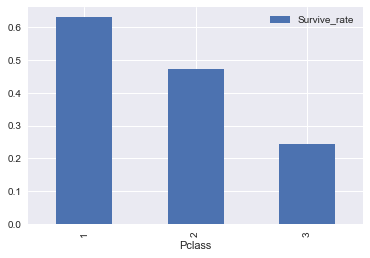

In [278]:
survived_rate_pclass.plot(kind='bar')

一般来说，游轮舱房的设置，Pclass=1 的应该在上层， Pclass=2 的在中层， Pclass=3 在底层  
则按常理推测，生还率会是按顺序递减，即 生还率(Pclass=1) > 生还率(Pclass=2) > 生还率(Pclass=3)  
  
从数据结果来看，符合这种递减趋势。可以将舱房等级视为生还的因素之一。

### 性别

In [283]:
titanic_sex = titanic_key_factors[['Survived', 'Sex']]
# 按 Sex 分组
groupby_sex = titanic_sex.groupby('Sex')
# 各 Sex 的总数
total_groupby_sex = groupby_sex.count()
# 各 Sex 的生还数
survived_groupby_sex = groupby_sex.sum()

print total_groupby_sex.rename(columns={'Survived':'Total'})
print survived_groupby_sex

survive_rate_sex = (survived_groupby_sex / total_groupby_sex).rename(columns={'Survived':'Survive_rate'})
print survive_rate_sex

        Total
Sex          
female    314
male      577
        Survived
Sex             
female       233
male         109
        Survive_rate
Sex                 
female      0.742038
male        0.188908


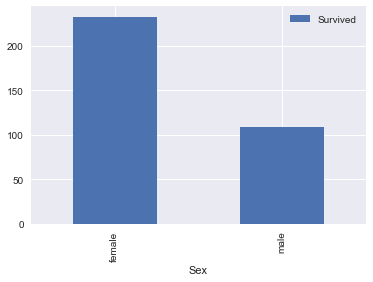

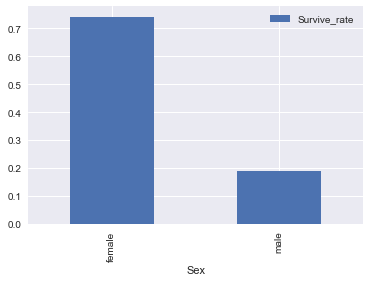

In [313]:
survived_groupby_sex.plot(kind='bar')
survive_rate_sex.plot(kind='bar')

女性生还率接近男性生还率的四倍。女性生还数是男性的两倍以上。  
  
按常理推测，男性的强壮性比女性高，生存几率应该较大。出现这种情况，有可能是男性协助女性逃生，或者说将生存机会让给女性。

### 年龄

In [166]:
titanic_age = titanic_key_factors[['Survived', 'Age']]

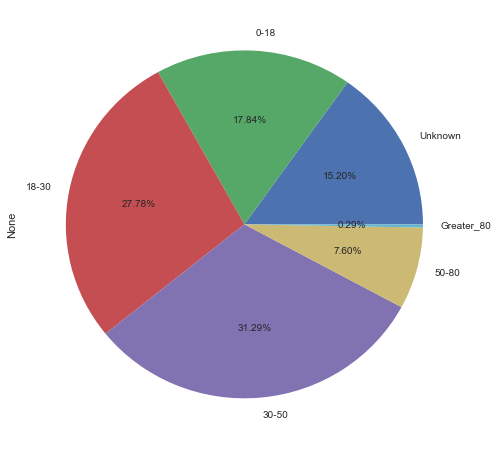

In [268]:
# 分组然后直接计算该年龄段的生还数，绘图
def sum_survived_by_age(dataframe, start, end):
    if start == None:
        return dataframe[dataframe.Age == end].sum()['Survived']
    elif end == None:
        return dataframe[dataframe.Age >= start].sum()['Survived']
    else:
        return dataframe[(dataframe.Age >= start) & (dataframe.Age < end)].sum()['Survived']   

age_unknown = sum_survived_by_age(titanic_age, None, 0)
age_less_18 = sum_survived_by_age(titanic_age, 0.01, 18)
age_18_30 = sum_survived_by_age(titanic_age, 18, 30)
age_30_50 = sum_survived_by_age(titanic_age, 30, 50)
age_50_80 = sum_survived_by_age(titanic_age, 50, 80)
age_greater_80 = sum_survived_by_age(titanic_age, 80, None)

age_distribution = pd.Series([age_unknown, age_less_18, age_18_30, age_30_50, age_50_80, age_greater_80], index=['Unknown', '0-18', '18-30', '30-50','50-80','Greater_80'])

age_distribution.plot(kind='pie',autopct='%.2f%%', figsize=(8, 8))   # autopct 用于显示饼图的比例

           Dead
age_group      
[0, 10)      24
[10, 20)     61
[20, 30)    143
[30, 40)     94
[40, 50)     55
[50, 60)     28
[60, 70)     13
[70, 80)      6
unknown     125
           Survived
age_group          
[0, 10)          38
[10, 20)         41
[20, 30)         77
[30, 40)         73
[40, 50)         34
[50, 60)         20
[60, 70)          6
[80, 90)          1
unknown          52


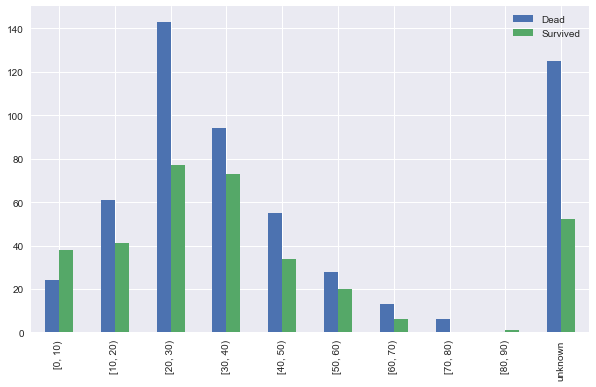

In [286]:
def group_age(age, lim):
    '''
    将年龄数据 age 分组，按照组距 lim 进行
    '''
    if age == 0:
        return 'unknown'
    group = int(age) / lim
    return ('[%d, %d)') % (group*10, group*10+10)

# 创建年龄分组
age_group = pd.DataFrame({
    'age_group':[group_age(age, 10) for age in titanic_age.Age]
})

groupby_age = pd.concat([titanic_age['Survived'], age_group], axis=1)
# 按年龄段分组的死亡数
dead_groupby_age = groupby_age[groupby_age.Survived==0].groupby('age_group').count()
# 按年龄段分组的生还数
survived_groupby_age = groupby_age[groupby_age.Survived==1].groupby('age_group').count()

print dead_groupby_age.rename(columns={'Survived':'Dead'})
print survived_groupby_age

titanic_age_group_count = pd.concat([dead_groupby_age.rename(columns={'Survived':'Dead'}),survived_groupby_age], axis=1)
titanic_age_group_count.plot(kind='bar', figsize=(10, 6))

           Survive_rate
age_group              
[0, 10)        0.612903
[10, 20)       0.401961
[20, 30)       0.350000
[30, 40)       0.437126
[40, 50)       0.382022
[50, 60)       0.416667
[60, 70)       0.315789
[70, 80)       0.000000
[80, 90)       0.000000
unknown        0.293785


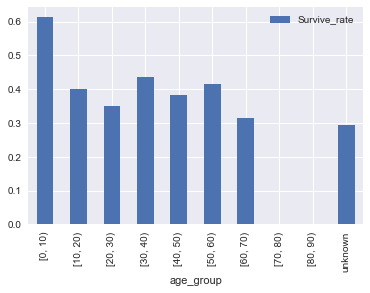

In [292]:
# 各年龄段的生存率
survive_rate_groupby_age = (survived_groupby_age / (survived_groupby_age + dead_groupby_age)).rename(columns={'Survived':'Survive_rate'})
# 填充空缺值
survive_rate_groupby_age = survive_rate_groupby_age.fillna(value=0)

print survive_rate_groupby_age

survive_rate_groupby_age.plot(kind='bar')

Survived     177
age_group    177
dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000022609518>], dtype=object)

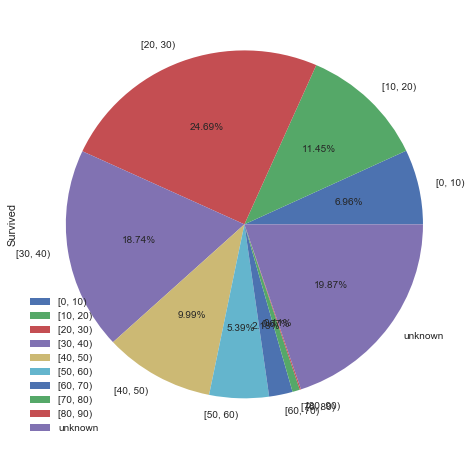

In [312]:
# 年龄未知的人数
num_unknown = groupby_age[groupby_age.age_group=='unknown'].count()

print num_unknown

# 各年龄段的人数占比
num_total = groupby_age.groupby('age_group').count()
num_total.plot(kind='pie', subplots=True, autopct='%.2f%%', figsize=(8, 8))

就年龄段的生存率来说，儿童（0-10）的生存几率最大（超过50%）。其它年龄段没有特别明显的差异，均小于50%。  
但由于年龄未知的人数较多（177人，占总体19.87%），对此判断可能存在较大影响。

## 多因素综合分析

结合上述三个因素，综合分析

In [314]:
# 获取 Pclass，Sex, age_group 三因素
titanic_key_factors_new = pd.concat([titanic_key_factors, age_group], axis=1)[['Survived', 'Pclass', 'Sex', 'age_group']]

In [320]:
total_groupby_key_factors = titanic_key_factors_new.groupby(['Pclass', 'age_group', 'Sex']).count()
survived_groupby_key_factors = titanic_key_factors_new.groupby(['Pclass', 'age_group', 'Sex']).sum()

print total_groupby_key_factors.head()
print survived_groupby_key_factors.head()

                         Survived
Pclass age_group Sex             
1      [0, 10)   female         1
                 male           2
       [10, 20)  female        13
                 male           5
       [20, 30)  female        16
                         Survived
Pclass age_group Sex             
1      [0, 10)   female         0
                 male           2
       [10, 20)  female        13
                 male           2
       [20, 30)  female        15


In [327]:
total_groupby_key_factors_unstack = total_groupby_key_factors.unstack().fillna(value=0)
survived_groupby_key_factors_unstack = survived_groupby_key_factors.unstack().fillna(value=0)

print total_groupby_key_factors_unstack.rename(columns={'Survived':'Total'})
print survived_groupby_key_factors_unstack

                  Total       
Sex              female   male
Pclass age_group              
1      [0, 10)      1.0    2.0
       [10, 20)    13.0    5.0
       [20, 30)    16.0   18.0
       [30, 40)    27.0   23.0
       [40, 50)    13.0   24.0
       [50, 60)    12.0   15.0
       [60, 70)     3.0   10.0
       [70, 80)     0.0    3.0
       [80, 90)     0.0    1.0
       unknown      9.0   21.0
2      [0, 10)      8.0    9.0
       [10, 20)     8.0   10.0
       [20, 30)    25.0   28.0
       [30, 40)    17.0   31.0
       [40, 50)    10.0    8.0
       [50, 60)     6.0    9.0
       [60, 70)     0.0    3.0
       [70, 80)     0.0    1.0
       unknown      2.0    9.0
3      [0, 10)     21.0   21.0
       [10, 20)    24.0   42.0
       [20, 30)    31.0  102.0
       [30, 40)    16.0   53.0
       [40, 50)     9.0   25.0
       [50, 60)     0.0    6.0
       [60, 70)     1.0    2.0
       [70, 80)     0.0    2.0
       unknown     42.0   94.0
                 Survived      
Sex    

In [328]:
survive_rate_groupby_key_factors = (survived_groupby_key_factors_unstack / total_groupby_key_factors_unstack).fillna(value=0).rename(columns={'Survived':'Survive_rate'})
survive_rate_groupby_key_factors

Survive_rate          
Sex                    female      male
Pclass age_group                       
1      [0, 10)       0.000000  1.000000
       [10, 20)      1.000000  0.400000
       [20, 30)      0.937500  0.500000
       [30, 40)      1.000000  0.521739
       [40, 50)      1.000000  0.375000
       [50, 60)      0.916667  0.266667
       [60, 70)      1.000000  0.100000
       [70, 80)      0.000000  0.000000
       [80, 90)      0.000000  1.000000
       unknown       1.000000  0.238095
2      [0, 10)       1.000000  1.000000
       [10, 20)      1.000000  0.100000
       [20, 30)      0.880000  0.000000
       [30, 40)      0.941176  0.096774
       [40, 50)      0.900000  0.125000
       [50, 60)      0.833333  0.000000
       [60, 70)      0.000000  0.333333
       [70, 80)      0.000000  0.000000
       unknown       1.000000  0.222222
3      [0, 10)       0.523810  0.380952
       [10, 20)      0.541667  0.095238
       [20, 30)      0.483871  0.156863
       [30, 40)      0.437500  0.150943
       [40, 50)      0.000000  0.080000
       [50, 60)      0.000000  0.000000
       [60, 70)      1.000000  0.000000
       [70, 80)      0.000000  0.000000
       unknown       0.595238  0.095745

In [329]:
survive_rate_groupby_key_factors.plot(kind='bar', figsize=(15,8))

从上图来看，可得出以下几个结论：
1. 女性生还率远大于男性生还率
2. `Pclass=1` 和 `Pclass=2` 的女性生还率非常高，而`Pclass=3`的女性生还率就偏低
3. `Pclass=1` 的男性生还率大于其他两个等级
4. 幼儿（不分性别）的生还率非常高，女性老者的生还率较高（大于男性老者）

# 初步结论

通过对泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息的分析，对于问题“有哪些因素会让船上的人生还率更高？”得出以下初步结论：

1. 舱房等级、性别、年龄是影响生还率的因素
2. 舱房等级越高，生还率越高（特别是女性）
3. 老幼生还率较高

然而，由于不清楚样本是否随机选取、样本量不大，且样本数据中存在信息缺失，初步结论并无法表明这三个因素与“生还率”具有相关性。